In [2]:
import numpy as np 
import matplotlib.pyplot as plt

### On commence par résoudre l'équation différentielle $y'(t)=-\lambda y(t)$ avec $\lambda$ une constante réelle. On utilise un schéma d'Euler explicite : 

\begin{equation*}
\frac{y^{n+1}-y^n}{\Delta t}=-\lambda y^n  \text{ qui donne } y^{n+1}=y^n-\Delta t\lambda y^n
\end{equation*}

### on affiche ensuite la solution numérique obtenue et la solution exacte (donnée par $y(t)=\exp(-\lambda t)) pour les comparer

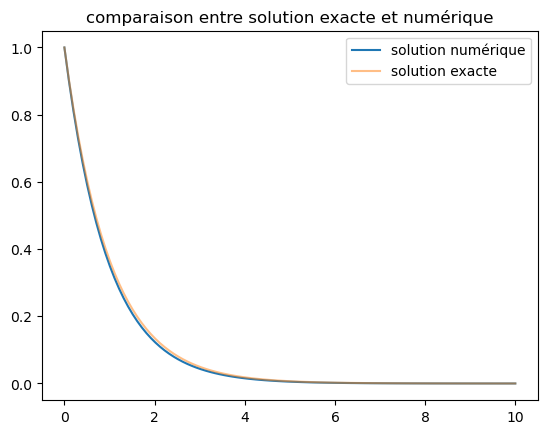

In [3]:
T=10
lmbd=1

def Euler_exp(dt):
    N=int(T/dt)
    
    t=np.linspace(0,T,N)
    y=np.exp(-lmbd*t)

    u0=np.ones(N)

    u=u0
    for n in range(N-1):
        u[n+1]=u[n]-lmbd*dt*u[n]
    
    erreur=(np.sum((u-y))**2)**0.5
        
    return u,erreur   

dt=0.1

t=np.linspace(0,T,int(T/dt))
u=Euler_exp(dt)[0]

plt.plot(t,u,label="solution numérique")
plt.plot(t,np.exp(-lmbd*t),label="solution exacte", alpha=0.5)
plt.title("comparaison entre solution exacte et numérique")
plt.legend()

#### On trace ensuite l'erreur (c'est à dire la différence en norme $L^2$ entre la solution exacte prises aux noeuds du maillage et la solution approchée déterminée par le schéma numérique) pour différents pas de temps $dt$

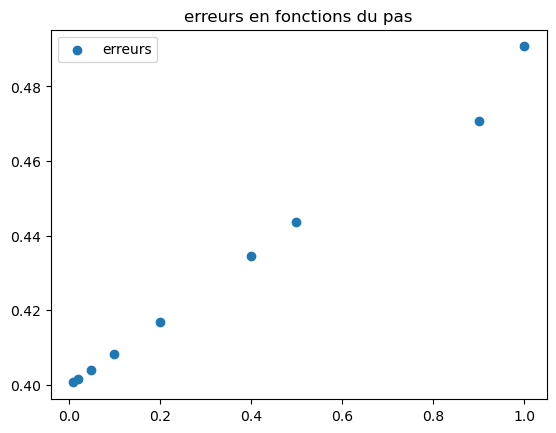

In [7]:
pas=[1,0.9,0.5,0.4,0.2,0.1,0.05,0.02,0.01]
erreurs=[]

for dt in pas:
    erreurs.append(Euler_exp(dt)[1])

plt.scatter(pas,erreurs,label="erreurs")  
plt.title("erreurs en fonctions du pas")
plt.legend()

#### On remarque alors que l'erreur est de l'ordre de $h$

#### On résoud maintenant l'équation d'avection diffusion

\begin{equation}
\left\{
\begin{aligned}
 &u_t + v_1 u_x + v_2 u_y - \nu ( u_{xx} + u_{yy} ) = -\lambda u + f \text{ sur } [0,1]\times[0,1] \\
 &u=0 \text{ sur } \partial[0,1]\times[0,1]\\
 &u(0,x,y)=0 \text{ pour tout } (x,y)\in[0,1]\times[0,1]
\end{aligned}
\right.
\end{equation}

#### Pour le terme source $f$, on prend $f(t,s) = T_c \exp(-k d(s,s_c)^2)$   avec $d(s,s_c)^2 = (s_1 - s_{c,1})^2 + (s_2 - s_{c,2})^2$ 

#### On procède de nouveau par différences finies. On affiche cote à cote la solution, l'erreur L2 de la solution et la norme du gradient

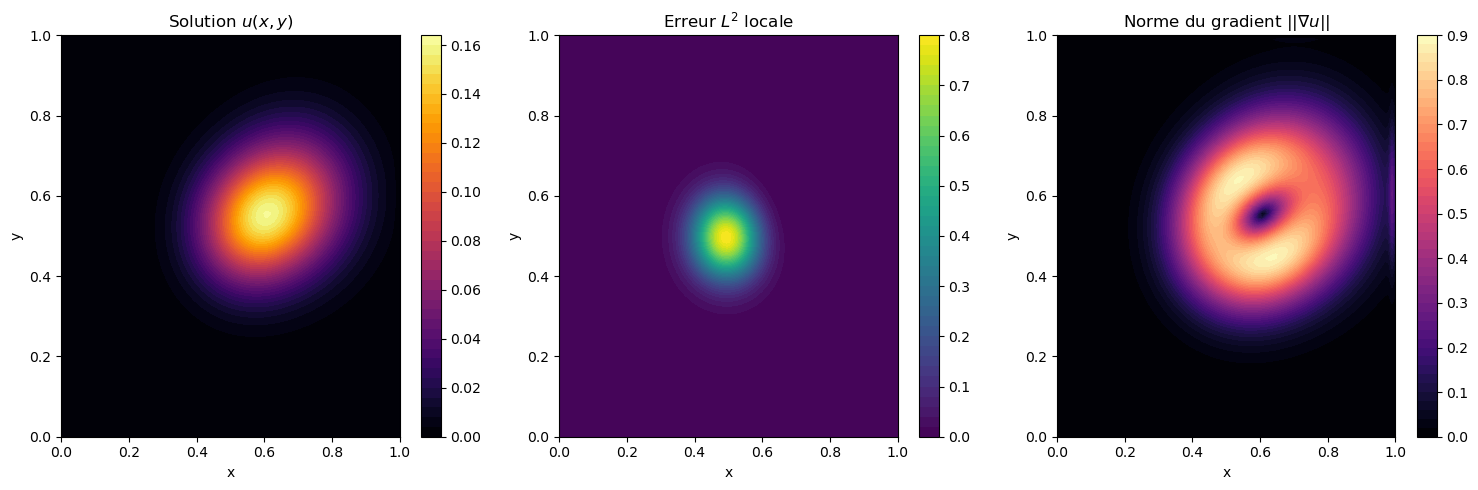

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- Paramètres du problème ---
Lx, Ly = 1.0, 1.0
Nx, Ny = 100, 100
dx, dy = Lx/(Nx-1), Ly/(Ny-1)
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

v1, v2 = 1.0, 0.5
nu = 0.01
lam = 0.1
Tc = 1.0
k = 50.0
xc, yc = 0.5, 0.5

# --- Fonction source ---
def f_source(X, Y):
    return Tc * np.exp(-k*((X - xc)**2 + (Y - yc)**2))

# --- Conditions initiales ---
u = np.zeros((Ny, Nx))

# --- Conditions aux limites (Dirichlet nulles) ---
def apply_bc(u):
    u[0,:] = 0
    u[-1,:] = 0
    u[:,0] = 0
    u[:,-1] = 0
    return u

# --- Pas de temps selon CFL ---
dt_conv = min(dx/abs(v1), dy/abs(v2))
dt_diff = 0.25*min(dx**2, dy**2)/nu
dt = 0.5*min(dt_conv, dt_diff)
Nt = 200

# --- Boucle temporelle ---
for n in range(Nt):
    u_new = u.copy()
    
    u_xx = (np.roll(u, -1, axis=1) - 2*u + np.roll(u, 1, axis=1)) / dx**2
    u_yy = (np.roll(u, -1, axis=0) - 2*u + np.roll(u, 1, axis=0)) / dy**2
    u_x = (np.roll(u, -1, axis=1) - np.roll(u, 1, axis=1)) / (2*dx)
    u_y = (np.roll(u, -1, axis=0) - np.roll(u, 1, axis=0)) / (2*dy)
    
    u_new += dt * (-v1*u_x - v2*u_y + nu*(u_xx + u_yy) - lam*u + f_source(X,Y))
    
    u = apply_bc(u_new)

# --- Solution "exacte" de référence (pour illustrer l'erreur) ---
u_exact = np.exp(-50*((X - 0.5)**2 + (Y - 0.5)**2))

# --- Erreur L2 locale ---
error_L2 = (u - u_exact)**2

# --- Norme du gradient ---
u_x = (np.roll(u, -1, axis=1) - np.roll(u, 1, axis=1)) / (2*dx)
u_y = (np.roll(u, -1, axis=0) - np.roll(u, 1, axis=0)) / (2*dy)
grad_norm = np.sqrt(u_x**2 + u_y**2)

# --- Affichage côte à côte ---
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Solution
im0 = axs[0].contourf(X, Y, u, 50, cmap='inferno')
axs[0].set_title("Solution $u(x,y)$")
fig.colorbar(im0, ax=axs[0])

# Erreur L2
im1 = axs[1].contourf(X, Y, error_L2, 50, cmap='viridis')
axs[1].set_title("Erreur $L^2$ locale")
fig.colorbar(im1, ax=axs[1])

# Norme du gradient
im2 = axs[2].contourf(X, Y, grad_norm, 50, cmap='magma')
axs[2].set_title("Norme du gradient $||\\nabla u||$")
fig.colorbar(im2, ax=axs[2])

for ax in axs:
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()


#### On revient à l'équation en dimension 1 mais avec des conditions aux bords différentes (Dirichlet non homogène à gauche, Neumann non homogène à droite)

\begin{equation}
\left\{
\begin{aligned}
&u_t + v_1 u_x - \nu  u_{xx} = -\lambda u + f \text{ sur } [0,1]\\
&u(0,x)=0 \text{ sur } [0,1]\\
&u(t,0)=d \text{ et } u_x(t,L)=g
\end{aligned}
\right.
\end{equation}

#### On procède encore par différences finies et on affiche la solution numérique obtenue 

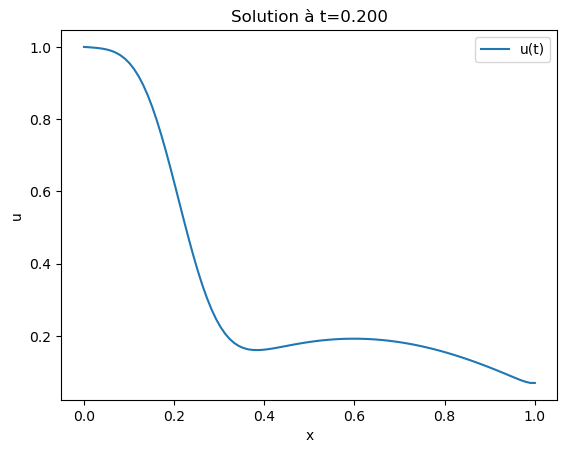

In [14]:
# --- Paramètres du problème ---
L = 1.0
Nx = 100
dx = L / (Nx-1)
x = np.linspace(0, L, Nx)

v1 = 1.0       # vitesse de convection
nu = 0.01      # diffusion
lam = 0.1      # perte
Nt = 200
dt = 0.001     # pas de temps

# --- Fonctions ---
def u0(x):
    return np.zeros_like(x)  # condition initiale

def d(t):
    return 1.0  # Dirichlet à gauche

def g(t):
    return 0.0  # Neumann à droite

def f(t,x):
    return np.sin(np.pi*x)  # exemple de source

# --- Initialisation ---
u = u0(x).copy()
u_new = u.copy()

# --- Boucle temporelle ---
for n in range(Nt):
    t = n*dt
    
    # --- Différences finies ---
    u_x = np.zeros_like(u)
    u_x[1:] = (u[1:] - u[:-1])/dx  # upwind simple pour convection
    u_x[0] = (u[1]-u[0])/dx        # au bord gauche

    u_xx = np.zeros_like(u)
    u_xx[1:-1] = (u[2:] - 2*u[1:-1] + u[:-2])/dx**2
    u_xx[0] = (u[1]-2*u[0]+d(t))/dx**2      # bord gauche Dirichlet
    u_xx[-1] = (u[-2] - 2*u[-1] + u[-2] + dx*g(t))/dx**2  # Neumann droit

    # --- Mise à jour explicite ---
    u_new = u + dt*(-v1*u_x + nu*u_xx - lam*u + f(t,x))
    
    # --- Conditions aux limites ---
    u_new[0] = d(t)
    u_new[-1] = u_new[-2] + dx*g(t)  # Neumann

    u = u_new.copy()

# --- Affichage ---
plt.plot(x, u, label='u(t)')
plt.xlabel('x')
plt.ylabel('u')
plt.title(f'Solution à t={Nt*dt:.3f}')
plt.legend()
plt.show()